### Numpy array vs Python Lists

In [1]:
 # speed
 # list

a = [i for i in range(10000000)]
b = [i for i in range(10000000,20000000)]
c = []
import time
start = time.time()
for i in range(len(a)):
  c.append(a[i]+b[i])
print(time.time()-start)


4.487927198410034


In [2]:
# Numpy :- same code with numpy
import numpy as np
a = np.arange(10000000)
b = np.arange(10000000,20000000)

start = time.time()
c = a+b
print(time.time()-start)

1.433750867843628


In [3]:
# memory

In [4]:
a = [i for i in range(10000000)]
import sys

sys.getsizeof(a)


89095160

In [5]:
a = np.arange(10000000, dtype=np.int32)
sys.getsizeof(a)

40000112

In [6]:
# numpy is better than built in data ypes of python
# time efficient
# memory efficient
# Convinient


### Advanced Indexing

In [7]:
# Normal Indexing and Slicing

a = np.arange(24).reshape(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [8]:
a[1:3,1:3]

array([[ 5,  6],
       [ 9, 10]])

In [9]:
# Fancy Indexing
a[[0,2,3,5]] # row
a[:,[0,2,3]] # column

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

In [10]:
# Boolean Indexing
# Super Important for both Numpy and Pandas
import numpy as np
a = np.random.randint(1,100,24).reshape(6,4)
a

array([[19, 51, 60, 47],
       [45, 79, 96, 98],
       [33,  1, 14, 99],
       [98, 72, 10, 80],
       [11, 92, 33, 27],
       [15, 90, 17, 56]])

In [11]:
# Find all numbers greater than 50
a > 50 # generate a boolean array according to condition
a[a>50] # Boolean Mask

array([51, 60, 79, 96, 98, 99, 98, 72, 80, 92, 90, 56])

In [12]:
# find out even numbers
a % 2 ==0
a[a%2==0]

array([60, 96, 98, 14, 98, 72, 10, 80, 92, 90, 56])

In [13]:
# Find all numbers greater than 50 and are even
# bitwise & = is used to work with boolean values
# Logical and is used for logical values
a[(a>50) & (a % 2==0)]

array([60, 96, 98, 98, 72, 80, 92, 90, 56])

In [14]:
# find all numbers not divisible by 7
print(a[a%7==0])
# not
a[~(a % 7 == 0)]

[98 14 98 56]


array([19, 51, 60, 47, 45, 79, 96, 33,  1, 99, 72, 10, 80, 11, 92, 33, 27,
       15, 90, 17])

### Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [15]:
# same shape
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)

print(a)
print(b)
print('Itemwise addition:\n',a+b)

a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

print(a)
print(b)
print(a+b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]
Itemwise addition:
 [[ 6  8 10]
 [12 14 16]]
[[0 1 2]
 [3 4 5]]
[[0 1 2]]
[[0 2 4]
 [3 5 7]]


#### Broadcasting Rules

**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

In [16]:
# More examples

a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)
print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [17]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [18]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print(b)

print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [19]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a)
print(b)

print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [ ]:
a = np.array([1])
# shape -> (1,1)
b = np.arange(4).reshape(2,2)
# shape -> (2,2)

print(a)
print(b)

print(a+b)

In [20]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [21]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

In [22]:
# Broadcasting helps with vectorization

### Working with Mathematical formulas

In [24]:
# sigmoid
# mean squared error
# categorical cross entropy

In [25]:
a = np.arange(10)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

#### Formula for sigmoid
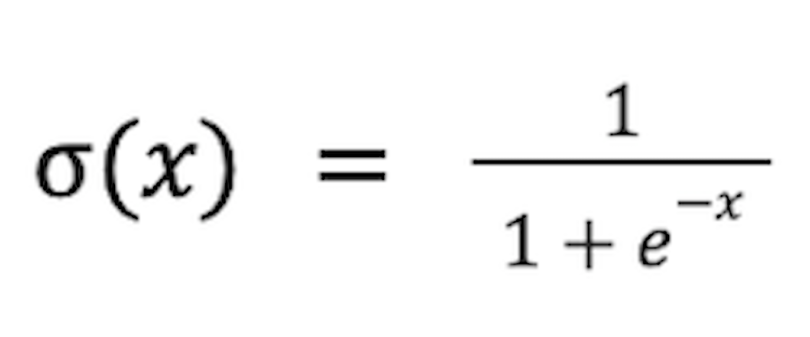

In [27]:
# sigmoid
def sigmoid(array):
  return 1/(1+np.exp(-(array)))

a = np.arange(10)
sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661])

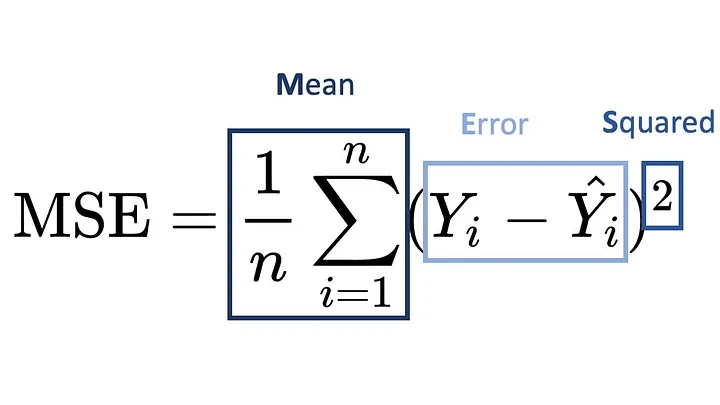

In [28]:
# Mean squared error

actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)

In [29]:
predicted

array([ 8, 45, 36,  2, 34, 30, 11, 22, 23, 35, 37,  3, 34, 48,  3, 33,  5,
       35, 30, 44, 29, 19, 39, 25, 27])

In [30]:
actual

array([37, 39, 14,  6, 35, 22, 49, 27, 26, 21,  4, 28, 28, 27, 46, 10, 27,
       30, 10,  6, 34, 31, 14, 20, 16])

In [32]:
def mse(actual,predicted):
  return np.mean((actual - predicted)**2)

mse(actual, predicted)

439.12

In [33]:
actual - predicted

array([ 29,  -6, -22,   4,   1,  -8,  38,   5,   3, -14, -33,  25,  -6,
       -21,  43, -23,  22,  -5, -20, -38,   5,  12, -25,  -5, -11])

In [ ]:
# Binary cross entropy

### Working with missing values

In [35]:
 # Working with missing values
# np.nan = missing values
a = np.array([1,2,3,4,np.nan,6])
a



array([ 1.,  2.,  3.,  4., nan,  6.])

In [39]:
a[~np.isnan(a)] # removing all the missing values

array([1., 2., 3., 4., 6.])

### Plotting Graphs